# Help test vector_paraxial_masks_XY

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline
%config InlineBackend.figure_format = 'png'
from pprint import pprint

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize']=5,5
rcParams['font.size']=14

In [3]:
from diffractio import degrees, mm, np, plt, sp, um
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.utils_tests import save_figure_test
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY
from py_pol.jones_matrix import Jones_matrix

In [4]:
v_linear_x = (1, 0)
v_linear_y = (0, 1)
v_circular = (1, 1j) / np.sqrt(2)

## test_unique_mask(self):

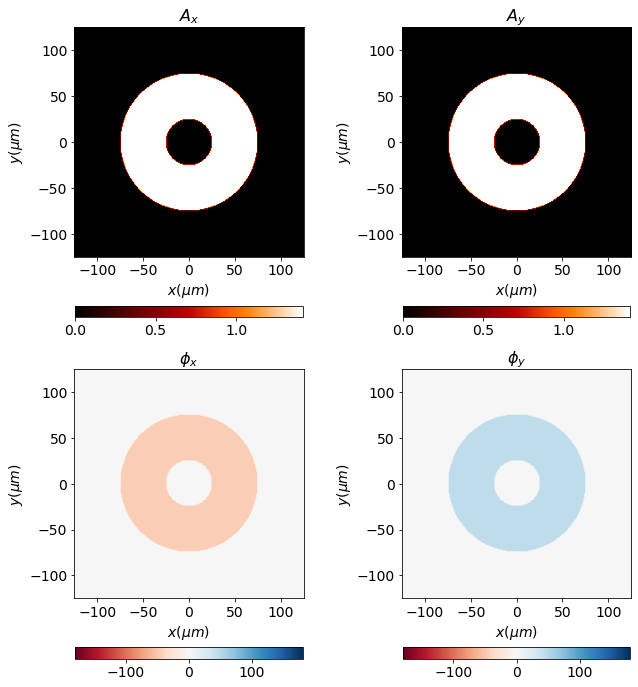

In [5]:
length = 250 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

# mask escalar
mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
vc = Vector_paraxial_mask_XY(x0, y0, wavelength)
vc.unique_mask(mask=mask, v=(1 - 1j, 1 + 1j, 0))
vc.draw(kind='fields');

## def test_equal_masks(self):

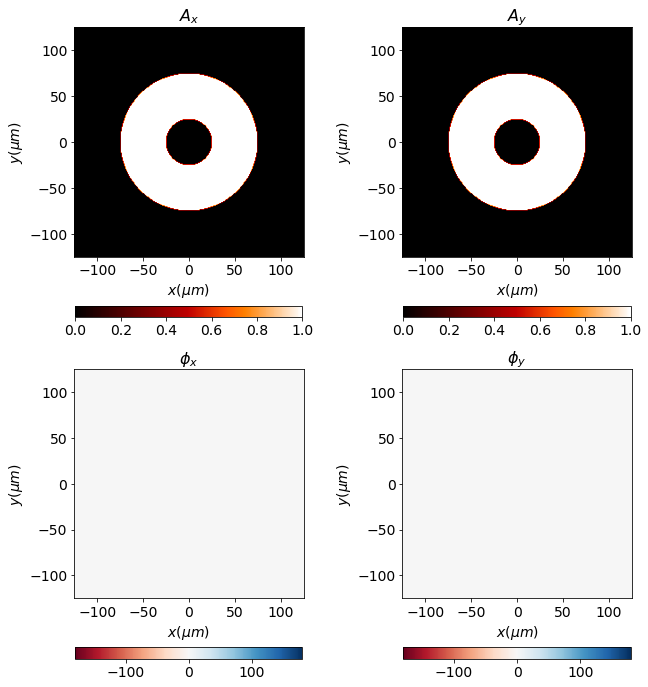

In [6]:
length = 250 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

# mask escalar
mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.ring(
    r0=(0 * um, 0 * um),
    radius1=(25 * um, 25 * um),
    radius2=(75 * um, 75 * um),
    angle=0 * degrees)

# mask vectorial
vc = Vector_paraxial_mask_XY(x0, y0, wavelength)
vc.equal_masks(mask=mask)
vc.draw(kind='fields');

## def test_complementary_masks(self):

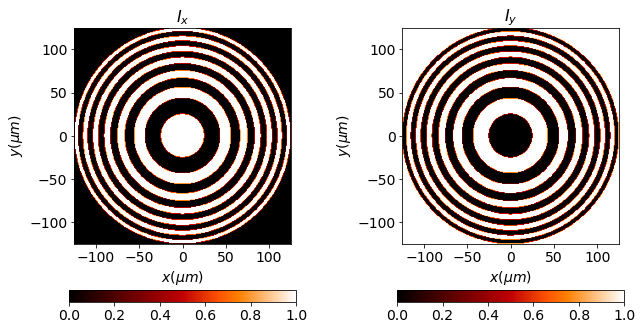

In [7]:
length = 250 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

mask = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
mask.fresnel_lens(
    r0=(0 * um, 0 * um),
    radius=(125 * um, 125 * um),
    focal=(2 * mm, 2 * mm),
    angle=0 * degrees,
    mask=True,
    kind='amplitude')

vc = Vector_paraxial_mask_XY(x0, y0, wavelength)
vc.complementary_masks(mask=mask, v1=(1, 0), v2=(0, 1))
vc.draw(kind='intensities');

## def test_apply_polarization(self):

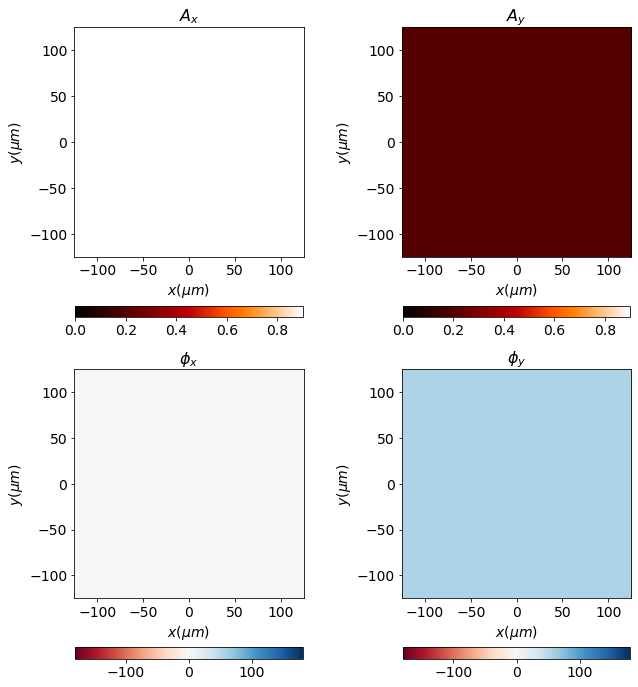

In [8]:
length = 250 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

PL = Jones_matrix('m0')
PL.from_elements(0.9, 0, 0, 0.2 * np.exp(1j))

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.apply_polarization(PL)

vp.draw(kind='fields');

## def test_polarizer_linear(self):

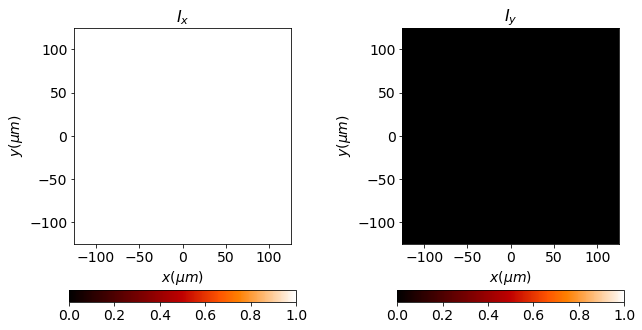

In [9]:
length = 250 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.polarizer_linear(angle=0 * degrees)

vp.draw(kind='intensities');

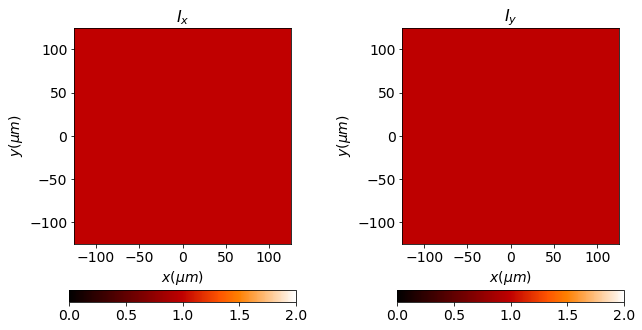

In [10]:
vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.polarizer_linear(angle=45 * degrees)
vp.draw(kind='intensities');

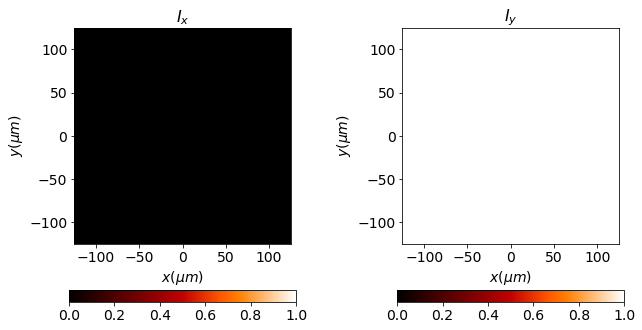

In [11]:
vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.polarizer_linear(angle=90 * degrees)

vp.draw(kind='intensities');

## def test_quarter_wave(self):

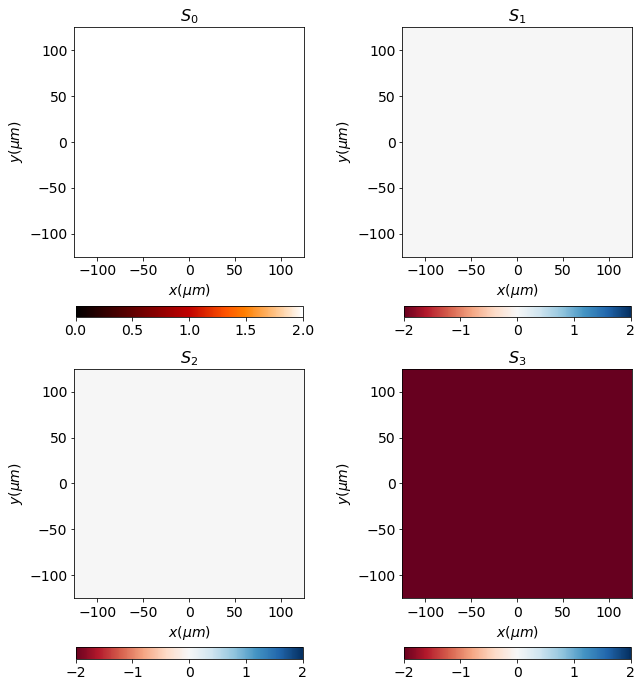

In [12]:
length = 250 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.quarter_waveplate(angle=0 * degrees)

vp.draw(kind='stokes');

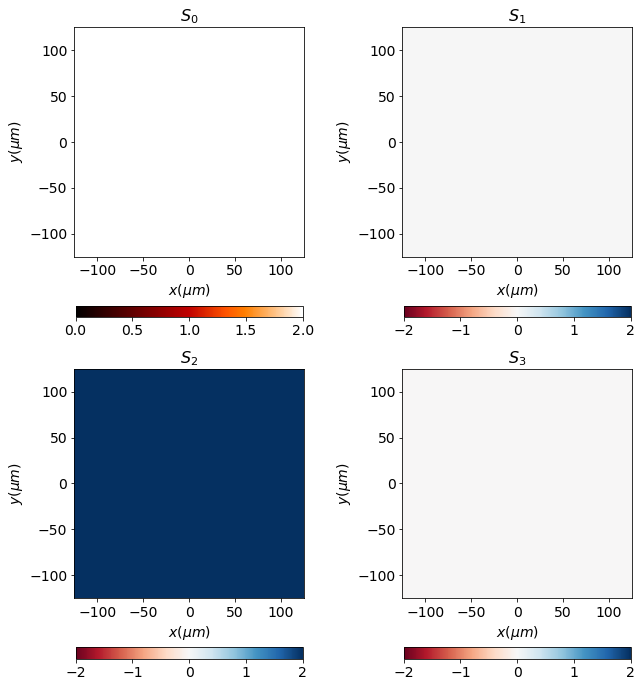

In [13]:
vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.quarter_waveplate(angle=45 * degrees)

vp.draw(kind='stokes');

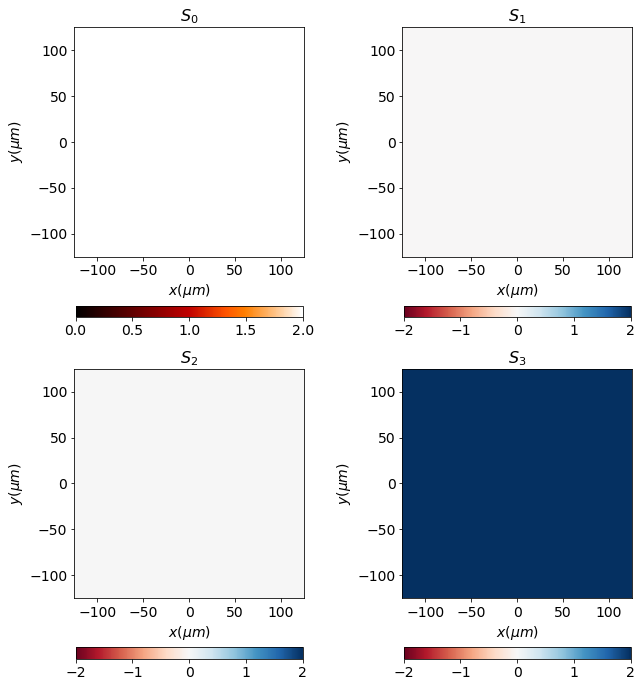

In [14]:
vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.quarter_waveplate(angle=90 * degrees)

vp.draw(kind='stokes');

## def test_half_wave(self):

(<matplotlib.image.AxesImage at 0x7f0175dec780>,
 <matplotlib.image.AxesImage at 0x7f017a220b70>)

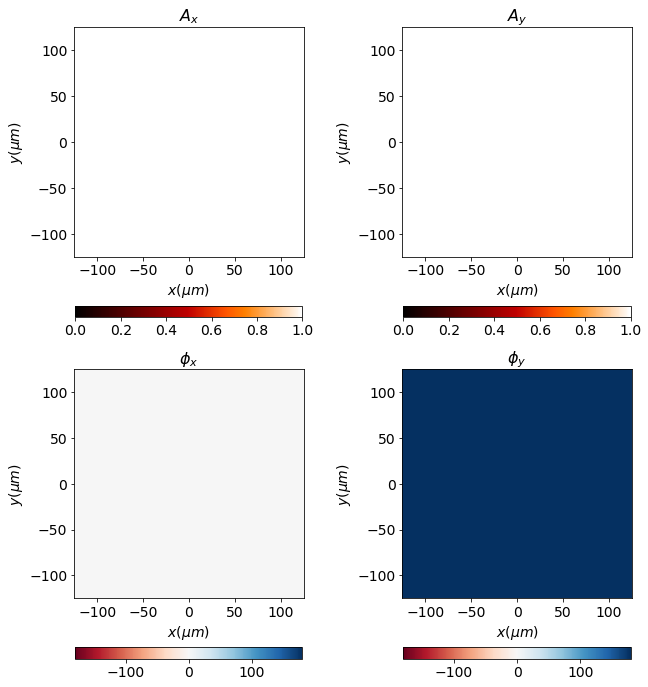

In [15]:
length = 250 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.half_waveplate(angle=0 * degrees)

vp.draw(kind='fields')

## def test_polarizer_retarder(self):

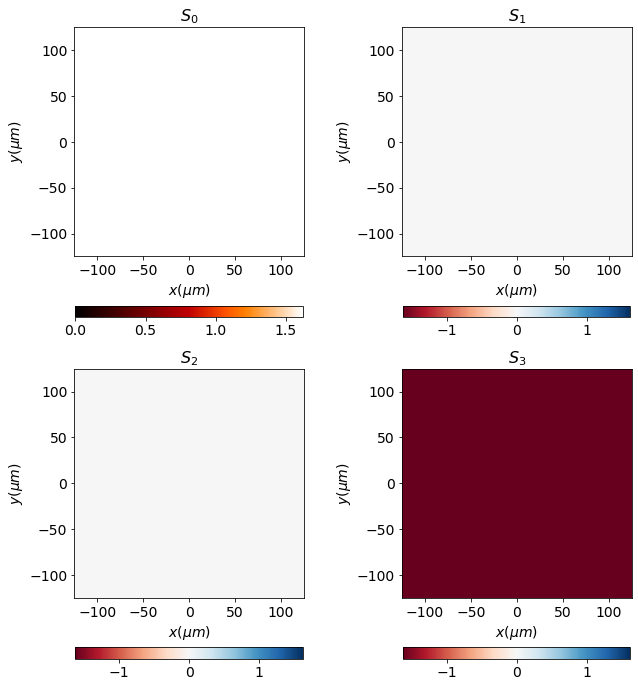

In [16]:
length = 250 * um
num_data = 256
wavelength = 0.6328 * um

x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)

vp = Vector_paraxial_mask_XY(x0, y0, wavelength)
vp.polarizer_retarder(
    delay=90 * degrees, p1=0.9, p2=0.1, angle=0 * degrees)

vp.draw(kind='stokes');